```mermaid
%%{ init: { 'flowchart': { 'curve': 'bumpX' } } }%%
flowchart LR
    A(工艺及介质参数)-->D(凝固传热计算)
    B(钢种热物性参数及计算条件)-->D(凝固传热计算)
    C(设备参数)-->D(凝固传热计算)
    D-->E(连铸坯温度场)
```

title：连铸区温度场模拟计算
## 钢物性参数 tab
    col1 20%
        - 浇筑钢种 selectbox
        - 浇筑温度 number_input
        - 液相线温度 number_input
        - 固相线温度 number_input
        - 热导率 number_input
        - 比热容 number_input
        - 密度 number_input
    col2 80%
        - 各项参数的显示
## 工艺及设备参数 tab
    
    - col1 15% 结晶器
      - 拉坯速度 number_input
      - 热流密度修正系数 number_input
      - 断面宽度 number_input
      - 断面厚度 number_input
      - 钢液高度 number_input
    - col2 15% 二冷区
      - 分区数目 number_input
        - 每个分区的冷却水量
        - 每个分区的冷却水温度
    - col3 70% 相关参数显示
      - 二冷区结构图形
      - 各项冷却水的水量与冷却水温度
## 计算参数 tab
    - col1 15% 计算设置
      - 空间步长
      - 时间步长
      - 初始化
      - 计算
    - col2 85% 结果显示
      - 结晶器进出口热图
      - 各二冷区分区热图

# 控制方程的理解与推导
## 核心控制方程
$$\rho c_{p} \frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x})+\frac{\partial }{\partial y}(\lambda \frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(\lambda \frac{\partial T}{\partial z})+\dot{q}$$
## 假设
- 拉坯方向的传热可以忽略，$\frac{\partial T}{\partial z}=0$，只考虑二维情况.
- 内热源作等效比热容处理，$\dot{q}=0$.
- 冷却水温度与环境温度忽略不计.
- 模拟1/4边界
## 简化后的控制方程及离散化
$$\rho \frac{\partial H}{\partial t}=\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x})+\frac{\partial }{\partial y}(\lambda \frac{\partial T}{\partial y})$$
### 方程左侧离散化
$$(\rho \frac{\partial H}{\partial t})_{i}^{p}=\rho\frac{H_{i}^{p+1}-H_{i}^{p}}{\Delta t}$$
### 方程右侧离散化
$$(\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x}))_{i}^{p}=\frac{T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p}}{(\Delta x)^{2}}$$
$$(\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x}))_{j}^{p}=\frac{T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p}}{(\Delta y)^{2}}$$
最终简化后的离散方程可化为:
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
## 边界条件
1.当x=0或者y=0时,为绝热边界条件.即$T_{i-1}^{p}=T_{i}^{p}$或$T_{j-1}^{p}=T_{j}^{p}$,离散方程为:
### 左边界
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-T_{i}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
### 下边界
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-T_{j}^{p})$$
### 右边界
x=width/2，y!=thickness/2，对流边界条件,需要在方程右边加上对流项$(-\frac{2h\Delta t(T_{i}^{p}-T_{f}^{p})}{\rho\Delta x})$,没有了i+1项
$$H_{i}^{p+1}=H_{i}^{p}-\frac{2h\Delta t}{\rho\Delta x}(T_{i}^{p}-T_{f}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
### 上边界
x!=width/2,y=thickness/2，对流边界条件需要在方程右边加上对流项$(-\frac{2h\Delta t(T_{j}^{p}-T_{f}^{p})}{\rho\Delta y})$,没有了j+1项
$$H_{j}^{p+1}=H_{j}^{p}-\frac{2h\Delta t}{\rho\Delta y}(T_{j}^{p}-T_{f}^{p})+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})$$
### 右上角角点
x=width/2，y=thickness/2，没有了j+1和i+1项，添加两个对流项
$$H_{i,j}^{p+1}=H_{i,j}^{p}-\frac{2\lambda\Delta t}{\rho\Delta y}(T_{i,j-1}^{p}-T_{i,j}^{p})-\frac{2\lambda\Delta t}{\rho\Delta x}(T_{i-1,j}^{p}-T_{i,j}^{p})+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1,j}^{p}-2T_{i,j}^{p}+T_{i-1,j}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{i,j+1}^{p}-2T_{i,j}^{p}+T_{i,j-1}^{p})$$
### 说明
- $h(T_{i,j}-T_{f})可简化为热流密度\phi $

C:\Users\15755\AppData\Local\Temp\ipykernel_1048\787643108.py:128: UserWarning: Glyph 179 (\N{SUPERSCRIPT THREE}) missing from font(s) SimHei.
  plt.tight_layout()
c:\software\anaconda\envs\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 179 (\N{SUPERSCRIPT THREE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


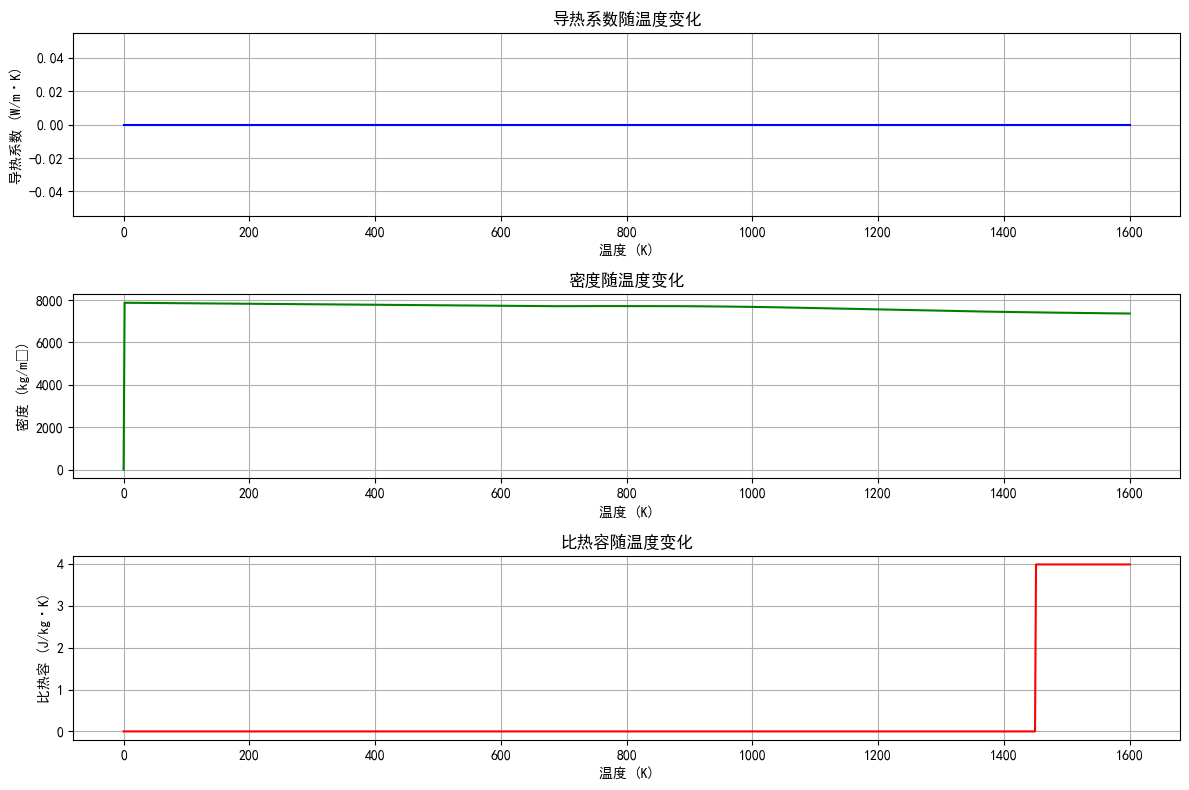

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 设置中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 使用黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题


class MaterialProperties:
    def get_conductivity(self, T):
        """获取导热系数(W/m·K)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_conductivity_scalar)(T)
        return self._get_conductivity_scalar(T)

    def _get_conductivity_scalar(self, T):
        if T > 1500:
            conductivity = 7.43111111111 * math.pow(10, -5) * math.pow(
                T, 1
            ) + 7.43111111111 * math.pow(10, -3)
        elif 1500 >= T > 800:
            conductivity = 1.0084739983 * math.pow(10, -5) * math.pow(
                T, 1
            ) + 1.75096149 * math.pow(10, -2)
        elif 800 >= T > 0:
            conductivity = (
                -2.0076797386 * math.pow(10, -8) * math.pow(T, 2)
                - 1.598864379 * math.pow(10, -5) * math.pow(T, 1)
                + 5.2147908 * math.pow(10, -2)
            )
        else:
            conductivity = 0  # 默认返回固定值，可以根据需要调整
        return conductivity

    def get_density(self, T):
        """获取密度(kg/m³)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_density_scalar)(T)
        return self._get_density_scalar(T)

    def _get_density_scalar(self, T):
        if T >= 1100:
            density = (
                4.2959176241 * math.pow(10, 0) * math.pow(T / 100, 2)
                - 1.6765194031 * math.pow(10, 2) * math.pow(T / 100, 1)
                + 8.9429828 * math.pow(10, 3)
            )
        elif 1100 > T >= 700:
            density = (
                -1.106096578 * math.pow(10, 1) * math.pow(T / 100, 2)
                + 1.783103348 * math.pow(10, 2) * math.pow(T / 100, 1)
                + 6.9950416 * math.pow(10, 3)
            )
        elif 700 >= T > 0:
            density = -2.35635949 * math.pow(10, 1) * math.pow(
                T / 100, 1
            ) + 7.867824 * math.pow(10, 3)
        else:
            density = 0  # 默认返回固定值，可以根据需要调整
        return density

    def get_specific_heat(self, T):
        """获取比热容(J/kg·K)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_specific_heat_scalar)(T)
        return self._get_specific_heat_scalar(T)

    def _get_specific_heat_scalar(self, T):
        if T > 1450:
            specific_heat = 4.1216
        elif 1450 >= T > 800:
            specific_heat = (
                1.2929460581 * math.pow(10, -8) * math.pow(T, 2)
                - 6.8834736218 * math.pow(10, -5) * math.pow(T, 1)
                + 7.507302074 * math.pow(10, -1)
            )
        elif 800 >= T > 0:
            specific_heat = (
                1.45128205128221 * math.pow(10, -12) * math.pow(T, 4)
                - 1.78359309535809 * math.pow(10, -9) * math.pow(T, 3)
                + 8.46127450980565 * math.pow(10, -7) * math.pow(T, 2)
                + 3.2909801527044 * math.pow(10, -6) * math.pow(T, 1)
                + 4.783194 * math.pow(10, -1)
            )
        else:
            specific_heat = 0  # 默认返回固定值，可以根据需要调整
        return specific_heat


# 创建一个MaterialProperties对象
material = MaterialProperties()

# 定义温度范围
T = np.linspace(0, 1600, 1000)

# 计算导热系数、密度和比热容
conductivity = material.get_conductivity(T)
density = material.get_density(T)
specific_heat = material.get_specific_heat(T)

# 绘制导热系数随温度变化的折线图
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, conductivity, label="导热系数 (W/m·K)", color="b")
plt.title("导热系数随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("导热系数 (W/m·K)")
plt.grid(True)

# 绘制密度随温度变化的折线图
plt.subplot(3, 1, 2)
plt.plot(T, density, label="密度 (kg/m³)", color="g")
plt.title("密度随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("密度 (kg/m³)")
plt.grid(True)

# 绘制比热容随温度变化的折线图
plt.subplot(3, 1, 3)
plt.plot(T, specific_heat, label="比热容 (J/kg·K)", color="r")
plt.title("比热容随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("比热容 (J/kg·K)")
plt.grid(True)

plt.tight_layout()
plt.show()


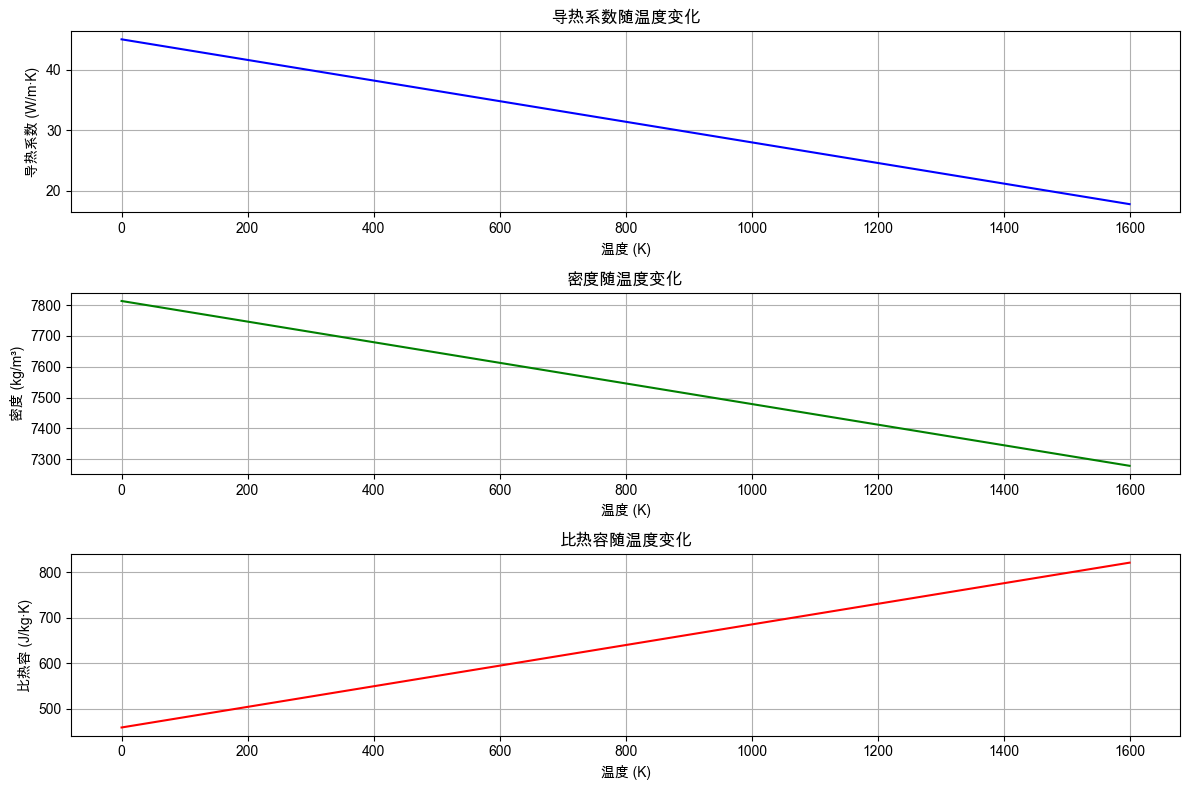

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 定义函数
def lamda(t):
    return (0.45041 - 1.7057 / 10000 * t) * 100


def rho(t):
    return (7.8137 - 3.3481 / 10000 * t) * 1000


def c(t):
    return (0.10971 + 5.4016 / 100000 * t) * 4184


# 生成温度范围
T = np.linspace(0, 1600, 1000)

# 计算函数值
conductivity = lamda(T)
density = rho(T)
specific_heat = c(T)


# 设置中文字体
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]  # 使用Arial Unicode MS
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
# 绘制导热系数随温度变化的折线图
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, conductivity, label="导热系数 (W/m·K)", color="b")
plt.title("导热系数随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("导热系数 (W/m·K)")
plt.grid(True)

# 绘制密度随温度变化的折线图
plt.subplot(3, 1, 2)
plt.plot(T, density, label="密度 (kg/m³)", color="g")
plt.title("密度随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("密度 (kg/m³)")
plt.grid(True)

# 绘制比热容随温度变化的折线图
plt.subplot(3, 1, 3)
plt.plot(T, specific_heat, label="比热容 (J/kg·K)", color="r")
plt.title("比热容随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("比热容 (J/kg·K)")
plt.grid(True)

plt.tight_layout()
plt.show()


# 液相线与固相线计算公式汇总
## 液相线计算公式
- 1988,商家K,提供给某钢铁公司超低头板坯连铸机
  $$Tl=1536.6-{88[C]+8[Si]+5[Mn]+5.5[Cu]+1.5[Cr]+4[Ni]+2[Mo]+18[Ti]+1}$$
  在式中，1℃是对P+S  而言。对气体和其他元素，必要时再减去2℃。$88[C]$ 是当含碳量≤0.5%时的系数，当含碳量>0.5%时超出部分系数为76,例如0.6% C含量时，意味着温度降低为0.5×88+0.1×76=51.6℃。
- 1997,《宝钢技术》第3期第20页,日本人的“平居公式”
  $$ Tl=1538-{55[C]+80[C]²+13[Si]+4.8[Mn]+1.5[Cr]+4.3[Ni]+30[P]+30[S]}$$
- 1990,《连续铸钢手册》冶金工业出版社81页
  - 各种钢
  $$Tl=1539-{70[C]+8[Si]+5[Mn]+30[P]+ 25[S]+[Cu]+4[Ni]+1.5[Cr]}$$
  $$Tl=1534-{73[C]+12[Si]+3[Mn]+28[P]+ 30[S]+7[Cu]+3.5[Ni]+[Cr]+3[Al]}$$
  当[C]<0.6%时
  $$Tl=1539-{90[C]+6.2[Si]+1.7[Mn]+28[P]+ 40[S]+2.6[Cu]+2.9[Ni]+1.8[Cr]+5.1[Al]}$$
  - 碳素钢
  $$Tl=1538-{f[C]+13[Si]+4.8[Mn]+1.5[Crl+3.1[Ni]}$$
  当[C]<0.5%时
  $$f[C]=55[C]+80[C]²$$
  当[C]≥0.5%时
  $$f[C]=44-21[C]+52[C]²$$
  当[C]<=0.5%时
  $$Tμ=1536-{78[C]+7.6[Si]+4.9[Mn]+34.4[P]+38[S]+4.7[Cu]+3.1[Ni]+1.3[Cr]+3.6[Al]}$$
  - 特殊钢种
  $$Tl=1534-{91[C]+21[Si]+3.5[Mn]+4[Ni]+ 0.65[Cr]+3[Mo]}$$
  $$Tl=1536-{100.3[C]-22.41[C]²-0.61+13.55[Si]-0.64[Si]²+5.82[Mn]+0.3[Mn]²+0.2[Cu]+4.18[Ni]+0.01[Ni]²+1.59[Cr]-0.007[Cr]²}$$
  用于碳素钢
  $$Tl=1536-{100.3[C]-22.41[C]²-0.61+13.55[Si]-0.64[Si]²+5.82[Mn]+0.3[Mn]²+0.2[Cu]+4.18[Ni]+0.01[Ni]²+1.59[Cr]-0.007[Cr]²}-3$$
  当[C]<=0.51%时
  $$Tl=1536-{0.1+83.9[C]+10[C]²+12.6[Si]+5.4[Mn]+4.6[Cu]+5.1[Ni]+1.5[Cr]- 33[Mo]-0[W]-30[P]-37[S]-9.5[Nb]}$$
- -,日本第34回特殊鋼部会S.43.3
  $$Tl=1536-{-0.61+100.3[C]-22.41[C]²+13.55[Si]-0.64[Si]²+5.82[Mn]+0.3[Mn]²+4.2[Cu]+4.18[Ni]-0.01[Ni]²+1.59[Cr]-0.007[Cr]²}$$
- 1989,《日本广田连铸技术》武钢二炼钢刘良春等编译第91页
  $$Tl=1536.6-{88[C]+25[S]+5[Cr]+8[Si]+5[Mn]+30[P]+2[Mo]+4[Ni]+18[Ti]+2[V]}$$
- 1994,《连续铸钢原理与工艺》
  $$Tl=1537-{88[C]+8[Si]+5[Mn]+30[P]+25[S]+5[Cu]+4[Ni]+2[Mo]+2[V]+1.5[Cr]}$$
- 1990,《连铸浇注工艺》倪满森编写技术报告
  $$Tl=1538-{f[C]+13[Si]+4.8[Mn]+1.5[Cr]+4.3[Ni]+30[P]+30[S]}$$
  当[C]<0.5%时
  $$f[C]=55[C]+80[C]²$$            
  当1.0≥[C]≥0.5%时
  $$f[C]=44-21[C]+52[C]²$$  
- 1969,《铁と鋼》1969Vol55
  $$Tl=1536.6-{88[C]+25[S]+30[P]+8[Si]+5[Mn]+18[Ti]+2[Mo]+4[Ni]+5[Cu]+2[V]+1.5[Cr]}$$
  $$Tl=1534-{80.5[C]+33.5[S]+33.5[P]+17.8[Si]+3.75[Mn]+3.4[Cu]+3.4[Al]+3[Ni]}$$
- 1990,商家D给S钢铁公司不锈钢连铸机推荐的公式
  $$Tl=1536.6-{90[C]+8[Si]+5[Mn]+30[P]+25[S]+1.5[Cr]+4[Ni]+2[Mo]+5[Cu]+90[N]}$$
- 2000,商家D给T钢铁公司不锈钢连铸机推荐的两个公式
  $$Tl=1536.6-{90[C]+8[Si]+5[Mn]+30[P]+25[S]+3[Al]+1.55[Cr]+4[Ni]+2[Mo]+18[Ti]+80[N]+5[Cu]}$$
  $$Tl=1536.6-{90[C]+8[Si]+5[Mn]+30[P]+25[S]+5[Cu]+4[Ni]+1.55[Cr]+2[Mo]+18[Ti]+80×0.0001([N]ppm-100)}$$
- 1994,《冶金单元设计》范光前编冶金工业出版社给出的用于不锈钢的公式
   $$Tl=1536-{78[C]+7.6[Si]+4.9[Mn]+34[P]+30[S]+5[Cu]+3.1[Ni]+1.3[Cr]+3.6[Al]+2[Mo]+2[V]+18[Ti]}$$
- 2003,《武钢炼钢生产技术进步概况》萧忠敏编冶金工业出版社第332页对硅钢
  $$Tl=1539-{65[C]+8[Si]+5[Mn]+30[P]+25[S]+5[Cu]+4[Ni]+2[Mo]+2[V]+1.5[Cr]}$$
- 2000,商家B给A钢铁公司不锈钢连铸机推荐的公式
  当[C]<0.2%时
  $$Tl=1536-{65[C]+8[Si]+5[Mn]+30[P]+25[S]+1.7[Al]+5[Cu]+1.5[Cr]+4[Ni]+2[V]+[W]+1.7[Co]+12.8[Zr]+7[Nb]+3[Ta]+14[Ti]+14[As]+10[Sn]} $$
  当 [C]=0.2%~0.5%时
  $$Tl=1536-{88[C]+8[Si]+5[Mn]+30[P]+25[S]+1.7[Al]+5[Cu]+1.5[Cr]+4[Ni]+2[V]}$$
  当[C]>0.5%时
  $$Tl=1536-{9[C]+65[C]²+10[Si]+6[Mn]+30[P]+30[S]+3[Al]+5[Cu]+1.5[Cr]+3.5[Ni]+2[V]}$$
- -,商家D在某钢铁公司碳钢板坯连铸机上采用下列公式计算液相线温度
  $$Tl=1536.6-{Factor[C]+8[Si]+5[Mn]+30[P]+25[S]+2[Ti]+2[Mo]+5[Cu]+4[Ni]+1.5[Cr]+5.1[Al]+90[N]}$$
  
  |[C]/%|	Factor	|
  |--|--|
  |0.000<[C]≤0.025|	90.0	|
  |0.025<[C]≤0.050|	82.0	|
  |0.050<[C]≤0.101	|86.0	|
  |0.101<[C]≤0.500|	88.4	|
  |0.500<[C]≤0.600|	86.1|
  |0.600<[C]≤0.700	|84.2|
  |0.700<[C]≤0.800	|83.2|
  |0.800<[C]≤1.000 |82.3|
- 商家D在另一钢铁公司提供的液相线温度计算方法
  $$Tl=1536.6-Factorl[C]\%-Factor2[其他元素]\%$$
  
  碳元素影响因子

  |[C]/%|Factor|
  |---|---|
  |≤0.025|90|
  |0.026~0.050|82|
  |0.060~0.10|86|
  |0.11~0.50|88.4|
  |0.51~0.60|86.1|
  |0.61~0.7|84.2|
  |0.71~0.8|83.2|
  |0.81~1.0|82.3|

  其他元素影响因子

  |其他元素代号|其他元素在钢中含量/%|Factor 2|
  |------------|-------------------|---------|
  |Si|0~3.0|8|
  |Mn|0~1.5|5|
  |P|0~0.7|30|
  |S|0~0.08|25|
  |Cr|0~18.0|1.5|
  |Ni|0~9.0|4|
  |Cu|0~0.3|5|
  |Mo|0~0.3|2|
  |V|0~1.0|2|
  |W|0~18.0|1|
  |As|0~0.5|14|
  |Sn|0~0.03|10|
  |Al|0~0.03|5.1|
  |Ti|0~100|17|
  |O|0~0.03|80|
  |N|0~0.03|90|
  |H|0~100|1300|

- 2006,《薄板坯连铸连轧钢的组织性能控制》
  $$Tl=1537-{65[C]+8[Si]+5[Mn]+30[P]+25[S]+2.7[Al]+80[O]+90[N]}$$
- 1990,《板坯连铸》冶金部工人技能视听教材编辑部编第46页
  $$Tl=1539-{165[C]+8[Si]+5[Mn]+30[P]+25[S]+5[Cu]+90[N]+80[O]+4[Ni]+1.5[Cr]}$$
- 2007,《品种钢、优特钢连铸900问》中国科学技术出版社干勇等编第65页
  $$Tl=1539-{70[C]+8[Si]+5[Mn]+30[P]+25[S]+ 4[Ni]+2[Mo]+2[V]}$$
- 1998,商家A提供给A钢铁公司板坯连铸机镀锡板计算公式
  $$Tl=1536.8-{88[C]+5[Mn]+8[Si]+30[P]+25[S]+5[Cr]+2[Mo]+4[Ni]+18[Ti]+2[V]}$$
- 1980,《国外连铸新技术》译文集(二)第14页
  $$Tl=1535-{78[C]+4.9[Mn]+3.6[Al]+7.6[Si]}$$
- 2013,《炼钢》第5期第66~67页
  $$Tl=1539-{70[C]+8[Si]+5[Mn]+30[P]+25[S]+4[Ni]+1.5[Cr]}$$
  适应于一般钢种
- 铸铁液相线温度
  $$Tl=1650-124.5[C]-26.7{[Si]+2.45[P]}$$

## 固相线计算公式
- 1997,《宝钢技术》第3期第20页日本人的“平居公式”
  当[C]≤0.09%时:
  $$Tss=1538-{478[C]+20.5[Si]+6.5[Mn]+2.0[Cr]+11.5[Ni]+5.5[Al]+500[P]+700[S]}$$
  当0.09%<[C]≤0.17% 时:
  $$Tss=1495-{20.5[Si]+6.5[Mn]+2.0[Cr]+11.5[Ni]+5.5[Al]+500[P]+700[S]}$$
  当[C]>0.17%时:
  $$Tss=1527-{187.5[C]+20.5[Si]+6.5[Mn]+2.0[Cr]+11.5[Ni]+5.5[Al]+500[P]+700[S]}$$
- 1990,《铁と鋼》第2号第217页長田修次等人给出的“平居正纯公式”
  $$Tss=θs-20.5[Si]-6.5[Mn]-2.0[Cr]-1.5[Ni]-5.5[Al]-156[P]-700[S]$$
  当[C]≤0.10% 时
  $$θs=1536-420[C]$$
  当0.10%<[C]≤0.185% 时
  $$θs=1494$$
  当[C]>0.185%时
  $$θs=1525.2-168.8[C]$$
- 1995,Simulation of cooling conditions in secondary cooling zone in continuous casting process.
  $$Tss=Fe-C系的熔点(℃)-{20.5[Si]+6.5[Mn]+500[P]+700[S]+2[Cr]+11.5[Ni]+5.5[Al]}$$
  $$Tss=Fe-C系的熔点(℃)-{7.6[Si]+4.9[Mn]+34.4[P]+3.8[S]+3.1[Ni]+1.3[Cr]+3.6[Al]}$$
  $$Tss=1536-{415.3[C]+12.3[Si]+6.8[Mn]+124.5[P]+183.9[S]+4.3[Ni]+1.4[Cr]+4.1[Al]}$$
- 1994,《连续铸钢》
  当[C]<0.1%时
  $$Tss = 1534-410CE$$
  当0.1%<=[C]<=0.2%时
  $$Tss = 1493$$
  当[C]<0.1%时
  $$Tss = 1534-184CE$$
  $$CE={80.5[C]+33.5[P]+33.5[S]+17.8[Si]+3.75[Mn]+3.4[Cu]+3.4[Al]+1.5[Cr]+3[Ni]}/80.5$$
- 2006,《薄板坯连铸连轧钢的组织性能控制》
  $$Tss=1537-{175[C]+20[Si]+30[Mn]+280[P]+575[S]+7.5[Al]+160[O]}$$
- 2007,《品种钢、优特钢连铸900问》中国科学技术出版社干勇等编第65页
  $$Tss=1534-2.29{80.5[C]+17.8[Si]+3.75[Mn]+33.5[P]+33.5[S]+3[N]+1.5[Cr]+3.4[Cu]+3.4[Al]}$$
- 2012,《钢铁》第10期第28页
  $$Tss=1536-{175[C]+20[Si]+30[Mn]+280[P]+575[S]+6.5[Cr]+4[V]+4.75[Ni]+7.5[Al]+2.5[W]+40[Ti]+5[Mo]+60[Nb]+160[O]}$$
- -,白口铸铁共晶温度
  $$Tsw=1104+9.8[C]-12.1{[Si]+2.45[P]}$$
- 2011,《连续铸钢生产技术》化学工业出版社杨吉春编著
  $$ Tss=1471-{25.2[C]+12[Si]+7.6[Mn]+34[P]+30[S]+5[Cu]+3.1[Ni]+1.3[Cr]+3.6[Al]+2[Mo]+2[V]+18[Ti]}$$